#  2020AIML544 - DEEP LEARNING - ASSIGNMENT - 2

### TASKS PERFORMED:

    1. IMPORT REQUIRED LIBRARIES
    2. LOAD THE IMAGES INTO TRAIN, VALIDATION AND TEST ARRAYS
    3. CREATE A DEFAULT CNN MODEL WITH GIVEN CONDITIONS
    4. TRAIN THE DEFAULT CNN MODEL AND PLOT THE TRAIN, TEST ACCURACY AND LOSS
    5. EVALUATE THE MODEL USING TEST DATA
    6. PRINT CLASSIFICATION RESULTS
    7. IMPROVE THE ABOVE DEFAULT MODEL BY CHANGING SOME HYPERPARAMETERS
    8. CREATED RESNET MODEL SINCE THE ACCURACY DID NOT IMPROVE MUCH
    9. PLOT A BAR GRAPH OF PRECISION AND RECALL FOR THE TWO MODELS - DEFAULT & IMPROVED
    10. PLOT A BAR GRAPH OF PRECISION AND RECALL FOR ALL 3 MODELS - DEFAULT, IMPROVED & RESNET

#### IMPORT REQUIRED LIBRARIES

In [1]:
# Import Libraries
# - Tensorflow
# - Keras
# - numpy and random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

# !pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Initializing the random number generator so that it can generate same random numbers on multiple executions of the code
import random
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

### <span style='background : yellow' > **TASK 1:**</span> Load the images in appropriate data structures in your program

In [3]:
# !pip install opencv-python
import glob, os, cv2

def load_images(my_path):
    # Get List of all images
    files = glob.glob(my_path + '/**/*.jpg', recursive=True)
    images= []
    names = []
    label = 0
    # For each folder
    for filename in os.listdir(my_path):
        files = glob.glob(my_path + filename + '/*.jpg', recursive=True)
        # For each image
        for file in files:
            print(file)
            img = cv2.imread(file)    
            if img is not None:
                img = img/255
                images.append(img)
                names.append(label)
        label = label + 1
    return images, names

In [7]:
# Image Location with subdirectories
train_images , train_names  = load_images("Sports_Dataset/archive/train/")
valid_images , valid_names  = load_images("Sports_Dataset/archive/valid/")
test_images  , test_names   = load_images("Sports_Dataset/archive/test/")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Sports_Dataset/archive/train/'

In [5]:
X_train = np.array(train_images)
y_train = np.array(train_names)

X_valid = np.array(valid_images)
y_valid = np.array(valid_names)

X_test  = np.array(test_images)
y_test  = np.array(test_names)

print('lengths of X_train, X_valid & X_test: ', len(X_train),len(X_valid),len(X_test))
print('lengths of y_train, y_valid & y_test: ', len(y_train),len(y_valid),len(y_test))

NameError: name 'train_images' is not defined

In [10]:
# define the keras model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Dense(30,activation="relu",use_bias=False,input_shape=(16,16,3)))
model.add(Dense(60, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(120, activation="relu",use_bias=False))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[accuracy])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16, 16, 30)        90        
                                                                 
 dense_13 (Dense)            (None, 16, 16, 60)        1860      
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 60)        0         
                                                                 
 dense_14 (Dense)            (None, 16, 16, 120)       7200      
                                                                 
 dense_15 (Dense)            (None, 16, 16, 10)        1210      
                                                                 
Total params: 10,360
Trainable params: 10,360
Non-trainable params: 0
_________________________________________________________________


NameError: name 'accuracy' is not defined

### <span style='background : yellow' > **TASK 2:**</span> Configure the CNN model (use keras tensorflow)

In [6]:
# Create a Sequential default object
default = Sequential()

# Add layers Conv2D for CNN and sepcify MaxPooling

# Layer 1 = input layer
default.add(Conv2D(32, kernel_size=(3, 3),strides=1,activation='relu',input_shape=(224,224,3)))
default.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
default.add(Conv2D(64, (3, 3), strides=1, activation='relu'))

# Layer 3
default.add(Conv2D(64, (3, 3), strides=1, activation='relu'))
default.add(MaxPooling2D(pool_size=(2, 2)))

default.add(Flatten())

# Add Dense layers or fully connected layers
# Layer 4
default.add(Dense(128, activation='relu'))

# Layer 5
default.add(Dense(73, activation='softmax'))

#Print summary of the default
default.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 179776)            0

In [7]:
# Configure the model for training, by using appropriate optimizers and regularizations
default.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

### <span style='background : yellow' > **TASK 3:**</span> Train the CNN model for E epoch (take E=25), save the train_loss, train_acc, validation_loss, validation_acc for each epoch and plot it after training has finished.

In [8]:
CNNdefault = default.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/25
326/326 [==============================] - 404s 1s/step - loss: 4.0518 - accuracy: 0.0584 - val_loss: 3.5490 - val_accuracy: 0.1233
Epoch 2/25
326/326 [==============================] - 383s 1s/step - loss: 2.9876 - accuracy: 0.2703 - val_loss: 3.0282 - val_accuracy: 0.2137
Epoch 3/25
326/326 [==============================] - 382s 1s/step - loss: 1.5112 - accuracy: 0.6034 - val_loss: 3.6420 - val_accuracy: 0.2164
Epoch 4/25
326/326 [==============================] - 385s 1s/step - loss: 0.3938 - accuracy: 0.8950 - val_loss: 5.5284 - val_accuracy: 0.2137
Epoch 5/25
326/326 [==============================] - 383s 1s/step - loss: 0.1286 - accuracy: 0.9710 - val_loss: 7.2353 - val_accuracy: 0.2082
Epoch 6/25
326/326 [==============================] - 384s 1s/step - loss: 0.0744 - accuracy: 0.9856 - val_loss: 7.4286 - val_accuracy: 0.2137
Epoch 7/25
326/326 [==============================] - 383s 1s/step - loss: 0.0684 - accuracy: 0.9842 - val_loss: 8.4242 - val_accuracy: 0.1973

In [9]:
print('Final training loss \t', CNNdefault.history['loss'][-1])
print('Final training accuracy ', CNNdefault.history['accuracy'][-1])

Final training loss 	 0.0166790671646595
Final training accuracy  0.995583713054657


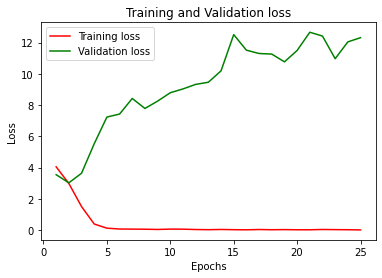

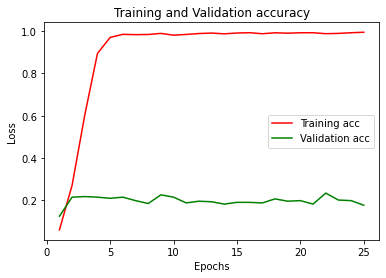

In [10]:
# plotting training and validation loss

loss = CNNdefault.history['loss']
val_loss = CNNdefault.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = CNNdefault.history['accuracy']
val_acc = CNNdefault.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### <span style='background : yellow' > **TASK 4:**</span> Evaluate the trained CNN model on test data. Print classification results.

In [11]:
# Evaluate the model on test data

loss, accuracy = default.evaluate(X_test, y_test)

print('Accuracy on test data:',format(accuracy,'.2f'))
print('Loss on test data    :',format(loss,'.2f'))

12/12 [==============================] - 3s 268ms/step - loss: 11.4002 - accuracy: 0.1808
Accuracy on test data: 0.18
Loss on test data    : 11.40


In [12]:
Y_prediction_def = default.predict(X_test)

# Convert predictions classes to one hot vectors 
Y_pred_classes_def = np.argmax(Y_prediction_def, axis = 1) 

#### CLASSIFICATION RESULTS

In [13]:
# Classification Report

print(classification_report(y_test, Y_pred_classes_def))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.22      0.40      0.29         5
           4       0.17      0.20      0.18         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5
           7       0.33      0.20      0.25         5
           8       0.20      0.20      0.20         5
           9       0.25      0.20      0.22         5
          10       0.17      0.20      0.18         5
          11       0.00      0.00      0.00         5
          12       0.33      0.20      0.25         5
          13       0.25      0.20      0.22         5
          14       0.08      0.20      0.12         5
          15       0.50      0.40      0.44         5
          16       0.50      0.20      0.29         5
          17       0.60    

In [14]:
default_precision = precision_score(y_test, Y_pred_classes_def, average='weighted')
default_recall    = recall_score(y_test, Y_pred_classes_def, average='weighted')

print("precision & recall of default model : ", round(default_precision,2), '&', round(default_recall,2))

precision & recall of default model :  0.2 & 0.18


### <span style='background : yellow' > **TASK 5 (i):**</span> Make changes in any way in the CNN model and improve your test accuracy: 
#### Made the network deeper, increased the nodes, epochs and included Dropout

In [15]:
# Create a Sequential improved object
improved = Sequential()

# Add layers Conv2D for CNN and sepcify MaxPooling

# Layer 1 = input layer
improved.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu',input_shape=(224,224,3)))
improved.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
improved.add(Conv2D(32, (3, 3), strides=2, activation='relu'))
improved.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
improved.add(Conv2D(32, (3, 3), strides=2, activation='relu'))
improved.add(Dropout(0.25))
improved.add(Flatten())

# Add Dense layers or fully connected layers
# Layer 4
improved.add(Dense(64, activation='relu'))

# Layer 5
improved.add(Dense(64, activation='relu'))
improved.add(Dropout(0.5))

# Layer 6
improved.add(Dense(73, activation='softmax'))

#Print summary of the improved
improved.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 55, 55, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)       

In [16]:
# Configure  the model for training, by using appropriate optimizers and regularizations
improved.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
CNNimproved = improved.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/30
326/326 [==============================] - 214s 653ms/step - loss: 4.2309 - accuracy: 0.0204 - val_loss: 4.0676 - val_accuracy: 0.0274
Epoch 2/30
326/326 [==============================] - 203s 622ms/step - loss: 3.9997 - accuracy: 0.0377 - val_loss: 3.7364 - val_accuracy: 0.0384
Epoch 3/30
326/326 [==============================] - 200s 613ms/step - loss: 3.6756 - accuracy: 0.0798 - val_loss: 3.4400 - val_accuracy: 0.1288
Epoch 4/30
326/326 [==============================] - 198s 607ms/step - loss: 3.3960 - accuracy: 0.1204 - val_loss: 3.1583 - val_accuracy: 0.1753
Epoch 5/30
326/326 [==============================] - 198s 607ms/step - loss: 3.1715 - accuracy: 0.1626 - val_loss: 2.9769 - val_accuracy: 0.2247
Epoch 6/30
326/326 [==============================] - 198s 606ms/step - loss: 2.9906 - accuracy: 0.2032 - val_loss: 2.7604 - val_accuracy: 0.2986
Epoch 7/30
326/326 [==============================] - 196s 600ms/step - loss: 2.8354 - accuracy: 0.2319 - val_loss: 2.7095 -

In [18]:
# evaluate the model

loss, accuracy = improved.evaluate(X_test, y_test)

print('Accuracy on test data:',format(accuracy,'.2f'))
print('Loss on test data    :',format(loss,'.2f'))

12/12 [==============================] - 2s 160ms/step - loss: 2.6778 - accuracy: 0.4110
Accuracy on test data: 0.41
Loss on test data    : 2.68


In [19]:
Y_prediction_imp = improved.predict(X_test)

# Convert predictions classes to one hot vectors 
Y_pred_classes_imp = np.argmax(Y_prediction_imp, axis = 1) 

In [20]:
imp_precision = precision_score(y_test, Y_pred_classes_imp, average='weighted')
imp_recall    = recall_score(y_test, Y_pred_classes_imp, average='weighted')

print("precision & recall of improved model : ", round(imp_precision,2), '&', round(imp_recall,2))

precision & recall of improved model :  0.44 & 0.41


#### <span style='background : yellow' > **Observation:**</span> Tried to improve the test accuracy by making the network more deeper, increasing the epochs, increasing strides, adding dropout function and changing number of nodes in few layers too, however, the test accuracy did not improve much and moreover train accuracy reduced, hence will be trying resnet model instead which will use skip connection technique and improve the accuracy much better.

### <span style='background : yellow' > **IMPROVING FURTHER BY USING RESNET MODEL:**</span> 

In [21]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True,
                                                           validation_split = 0.02)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)

val_gen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)

In [22]:
train_dir  = "Sports_Dataset/archive/train/"
test_dir   = "Sports_Dataset/archive/test/"
val_dir    = "Sports_Dataset/archive/valid/"

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 32
                                           )
test_data  = test_gen.flow_from_directory(test_dir,
                                         target_size =(224,224),
                                         class_mode = "categorical",
                                         batch_size = 32
                                         )
val_data   = val_gen.flow_from_directory(val_dir,
                                       target_size =(224,224),
                                       class_mode = "categorical",
                                       batch_size = 32
                                       )

Found 10416 images belonging to 73 classes.
Found 365 images belonging to 73 classes.
Found 365 images belonging to 73 classes.


### <span style='background : yellow' > **BUILDING A RESNET MODEL:**</span> 

In [23]:
base_model = tf.keras.applications.ResNet50V2(include_top= False) 
base_model.trainable = False

inputs = tf.keras.Input(shape=(224,224,3))

x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(73, activation="softmax")(x)

res_model = tf.keras.Model(inputs, outputs)
res_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_5 (Dense)             (None, 73)                149577    
                                                                 
Total params: 23,714,377
Trainable params: 149,577
Non-trainable params: 23,564,800
_________________________________________________________________


In [24]:
# compiling the model
res_model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

In [25]:
# fitting data to the model
res_model.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = val_data,
    validation_steps = len(val_data)
)

Epoch 1/5
326/326 [==============================] - 489s 1s/step - loss: 1.5113 - accuracy: 0.6143 - val_loss: 0.4417 - val_accuracy: 0.8822
Epoch 2/5
326/326 [==============================] - 461s 1s/step - loss: 0.6108 - accuracy: 0.8286 - val_loss: 0.3380 - val_accuracy: 0.9041
Epoch 3/5
326/326 [==============================] - 461s 1s/step - loss: 0.4454 - accuracy: 0.8727 - val_loss: 0.2641 - val_accuracy: 0.9041
Epoch 4/5
326/326 [==============================] - 460s 1s/step - loss: 0.3763 - accuracy: 0.8918 - val_loss: 0.2726 - val_accuracy: 0.9205
Epoch 5/5
326/326 [==============================] - 461s 1s/step - loss: 0.3245 - accuracy: 0.9052 - val_loss: 0.2059 - val_accuracy: 0.9315


In [26]:
# evaluate the model with test data

loss, accuracy = res_model.evaluate(test_data)

print('Accuracy on test data:',format(accuracy,'.2f'))
print('Loss on test data    :',format(loss,'.2f'))

12/12 [==============================] - 15s 1s/step - loss: 0.1864 - accuracy: 0.9452
Accuracy on test data: 0.95
Loss on test data    : 0.19


In [27]:
Y_prediction = res_model.predict(X_test)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction, axis = 1) 

In [28]:
res_precision = precision_score(y_test, Y_pred_classes, average='weighted')
res_recall    = recall_score(y_test, Y_pred_classes, average='weighted')

print("precision & recall of resnet model : ", round(res_precision,2), '&', round(res_recall,2))

precision & recall of resnet model :  0.9 & 0.86


### <span style='background : yellow' > **TASK 5 (ii):**</span> Plot precision and recall for default and improved model in a single bar plot. 

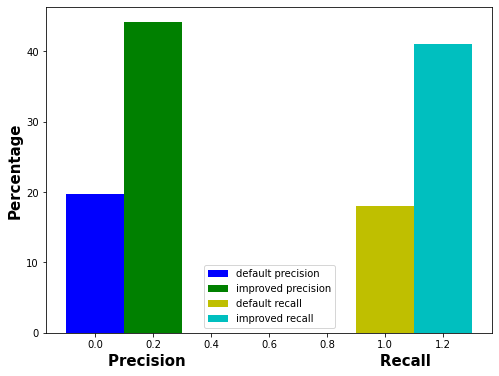

In [29]:
x = np.arange(1)
width = 0.20
  
fig = plt.subplots(figsize =(8, 6))

plt.bar(x, default_precision*100, width, color ='b', label='default precision')
plt.bar(x+0.2, imp_precision*100, width, color ='g', label='improved precision')

plt.bar(x+1.0, default_recall*100, width, color ='y', label='default recall')
plt.bar(x+1.2, imp_recall*100, width, color ='c', label='improved recall')

plt.xlabel('Precision                                     Recall', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentage', fontweight ='bold', fontsize = 15)

plt.legend()
plt.show()

#### Bar plot of precision & recall of default, improved & much improved resnet models

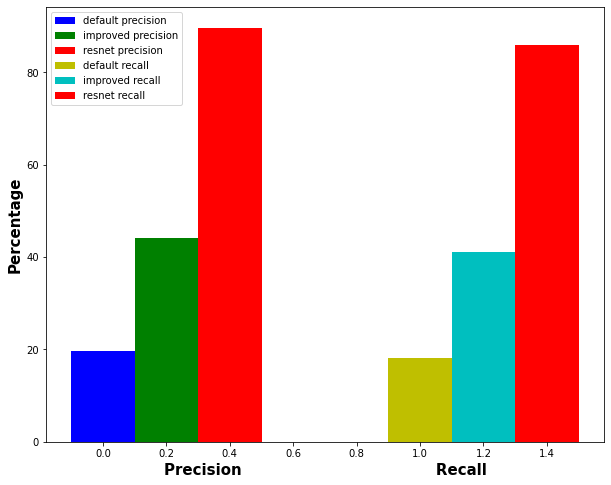

In [31]:
x = np.arange(1)
width = 0.20
  
fig = plt.subplots(figsize =(10, 8))

plt.bar(x, default_precision*100, width, color ='b', label='default precision')
plt.bar(x+0.2, imp_precision*100, width, color ='g', label='improved precision')
plt.bar(x+0.4, res_precision*100, width, color ='r', label='resnet precision')

plt.bar(x+1.0, default_recall*100, width, color ='y', label='default recall')
plt.bar(x+1.2, imp_recall*100, width, color ='c', label='improved recall')
plt.bar(x+1.4, res_recall*100, width, color ='r', label='resnet recall')

plt.xlabel('Precision                                     Recall', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentage', fontweight ='bold', fontsize = 15)

plt.legend()
plt.show()

#### <span style='background : yellow' > **Observation :**</span> 
#### <span style='background : yellow' > **Precision and Recall**</span>  for the default model     : 20% & 18% for 25 epochs
#### Precision and Recall for the improved model : 44% & 41% for 30 epochs
#### Precision and Recall for the ResNet model     : 90% & 86% for just 5 epochs.
#### <span style='background : yellow' > **Test accuracy**</span> for default model : 18% for 25 epochs
#### Test accuracy for improved model : 38% for 25 epochs
#### Test accuracy for ResNet model : 95% for just 5 epochs